#**REDDIT APP DATA / ASSIGNMENT-3**

**AUTHENTICATION**

In [1]:
pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.0 MB/s eta 0:00:00


In [2]:
#importing praw package
import praw
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="_pv720xfCgXOHEmbgBNCgg",
    client_secret="3k3wbDwk3dRlWrlw7CzB62_3RX_NIA",
    user_agent=user_agent)

**IMPORTING PACKAGES**

In [3]:
#importing pandas , numpy and regex modules
import pandas as pd
import numpy as np
import re #RegEx : Regular expression


**SELECT TRENDING TOPIC FROM REDDIT**

The "recession" subreddit channel will be use for this project

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("recession").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



A Stamford CT partially WFH employee would be paid 15% less
p2b06c
MikeMauls
1628680556.0
17
0.91
https://www.businessinsider.com/google-salary-calculator-work-from-home-pay-cut-technology-2021-8
0


**GET TOTAL COMMENT IN SUBREDDIT**

In [5]:
#top posts from the "recession" subreddit using PRAW
headlines = set()
for submission in reddit.subreddit("recession").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



67



**SCRAPPED DATA**

In [6]:
#Create a dataframe from the scrapped data
df = pd.DataFrame(headlines)
df.head()

,0
0,THE world's biggest economies may plunge into ...
1,Germany heads for deep recession as EU leaders...
2,A Recession May Be Coming. Morgan Stanley Look...
3,The $2 trillion relief bill is massive but it ...
4,We're already in the recession


**REMOVING UNWANTED COLUMNS**

In [7]:
df_new = df.iloc[:, 1:]#removes unwanted columns in left
df.head()

,0
0,THE world's biggest economies may plunge into ...
1,Germany heads for deep recession as EU leaders...
2,A Recession May Be Coming. Morgan Stanley Look...
3,The $2 trillion relief bill is massive but it ...
4,We're already in the recession



**RETRIEVING COLUMN NAME**

In [8]:
#gives the column names
df.columns

RangeIndex(start=0, stop=1, step=1)


**RENAMING COLUMNS**

In [9]:
#renaming the column to titles
df.columns = ['Titles']

**HEAD METHOD**

In [10]:
#Gives first five columns in the dataframe
df.head()

,Titles
0,THE world's biggest economies may plunge into ...
1,Germany heads for deep recession as EU leaders...
2,A Recession May Be Coming. Morgan Stanley Look...
3,The $2 trillion relief bill is massive but it ...
4,We're already in the recession


**COUNTING DUPLICATE VALUES**

In [11]:
#counts the number of duplicate values in the 'Titles' column
df.Titles.duplicated().sum()

0

REDDIT APP DATA PREPROCESSING FOR RECESSION ANALYSIS

In [12]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :

    return text

#Cleaning the text
df["Titles"]= df["Titles"].apply(cleanTxt)

#Show the clean text
df.head()

,Titles
0,THE world's biggest economies may plunge into ...
1,Germany heads for deep recession as EU leaders...
2,A Recession May Be Coming. Morgan Stanley Look...
3,The $2 trillion relief bill is massive but it ...
4,We're already in the recession



**REMOVING EMOJI'S AND UNICODE FROM REDDIT DATA FOR ENHANCED ANALYSIS**

In [13]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["Titles"]= df["Titles"].apply(remove_emoji)

#Show the clean text
df.head()

,Titles
0,THE world's biggest economies may plunge into ...
1,Germany heads for deep recession as EU leaders...
2,A Recession May Be Coming. Morgan Stanley Look...
3,The $2 trillion relief bill is massive but it ...
4,We're already in the recession



**TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB AND WORDCLOUD**

In [14]:
#importing modules
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

**SENTIMENT ANALYSIS: SUBJECTIVITY AND POLARITY OF RECESSION RELATED TEXT**

In [15]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)

#Now display data
df.head()

,Titles,Subjectivity,Polarity
0,THE world's biggest economies may plunge into ...,0.0,0.000000
1,Germany heads for deep recession as EU leaders...,0.4,-0.121212
2,A Recession May Be Coming. Morgan Stanley Look...,0.0,0.000000
3,The $2 trillion relief bill is massive but it ...,1.0,0.000000
4,We're already in the recession,0.0,0.000000


**CATEGORIZING SWIFTIE SENTIMENT**

In [16]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df["Insight"] = df["Polarity"].apply(getInsight)
df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,THE world's biggest economies may plunge into ...,0.000000,0.000000,Neutral
1,Germany heads for deep recession as EU leaders...,0.400000,-0.121212,Negative
2,A Recession May Be Coming. Morgan Stanley Look...,0.000000,0.000000,Neutral
3,The $2 trillion relief bill is massive but it ...,1.000000,0.000000,Neutral
4,We're already in the recession,0.000000,0.000000,Neutral
5,'World faces worst decline since 1930s depress...,1.000000,-1.000000,Negative
6,Startup Layoffs by Industry Which Are Hit Hard...,0.000000,0.000000,Neutral
7,The U.S. Entered a Recession in February — The...,0.475000,-0.212500,Negative
8,This Is Not a Recession. It’s an Ice Age.,0.000000,0.000000,Neutral
9,Americans are hoarding cash as recession fears...,0.000000,0.000000,Neutral


**DATA VISUALIZATION**

In [17]:
#create visualizations using Seaborn, WordCloud, and Matplotlib with a specific visual style
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

**VISUALIZING SWIFTIE SENTIMENT DISTRIBUTION**

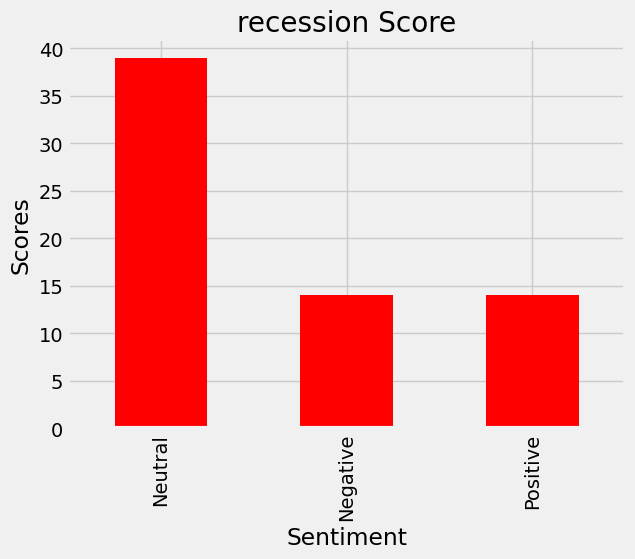

In [18]:
#Plot the values count of sentiment
plt.title("recession Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="red")
plt.show()


**WORDCLOUD FOR RECESSION**

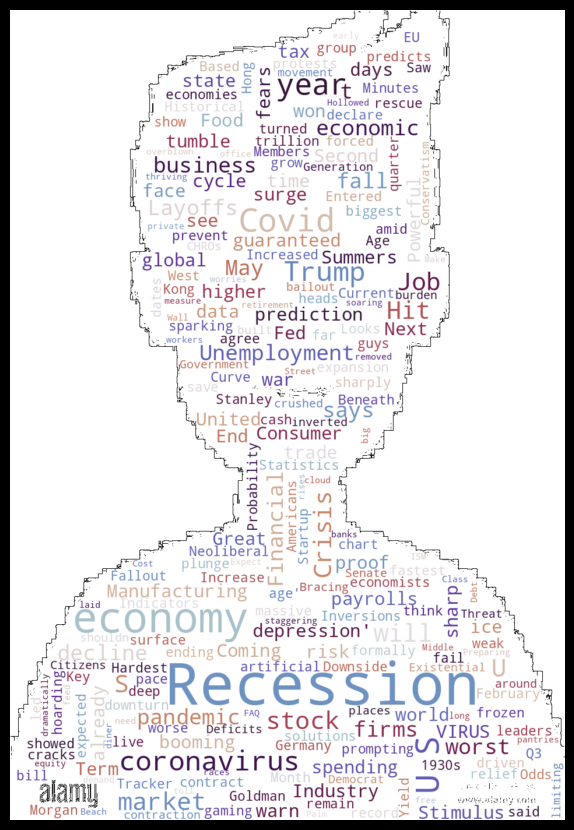

In [19]:
from PIL import Image
import numpy as np

text = ' '.join( [twts for twts in df['Titles']] )

image = Image.open('young-man-cartoon-MRPM90.jpg')
mask = np.array(image)

max_font_size = 100
min_font_size = 15

wordcloud = WordCloud(width=1000,
                      height = 600,
                      max_words = 1000,
                      stopwords = STOPWORDS,
                      mask = mask,
                      contour_width = 0.01,
                      colormap = 'twilight',
                      max_font_size = max_font_size,
                      min_font_size = min_font_size,
                      background_color = "white").generate(text)

# Display the generated image:

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
plt.show();

#**EXAMPLE2 : DATASCIENCE**

**AUTHENTICATION**

In [20]:
#importing praw package
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="5FRbgiDqpgtd7_Vv6ekKPQ",
    client_secret="E0-M3cQKRpKisIzziqPLFhUTG6tfYw",
    user_agent=user_agent
)

**IMPORTING PACKAGES**

In [21]:
#importing pandas , numpy and regex modules
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

**SELECT TRENDING TOPIC FROM REDDIT**

The "Datascience" subreddit channel will be use for this project

In [22]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("datascience").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Weekly Entering & Transitioning - Thread 12 Feb, 2024 - 19 Feb, 2024
1aos1w7
AutoModerator
1707714085.0
6
0.88
https://www.reddit.com/r/datascience/comments/1aos1w7/weekly_entering_transitioning_thread_12_feb_2024/
0



**GET TOTAL COMMENT IN SUBREDDIT**

In [23]:
#top posts from the "datascience" subreddit using PRAW
headlines = set()
for submission in reddit.subreddit("datascience").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



166



**SCRAPPED DATA**

In [24]:
#Create a dataframe from the scrapped data
df2 = pd.DataFrame(headlines)
df2.head()

,0
0,How do you do Ad-Hoc data exploration?
1,VR projects
2,"798 applications later, I got a job."
3,Consulting
4,How to deal with credentials in dockerfiles?



**REMOVING UNWANTED COLUMNS**

In [25]:
df = df2.iloc[:, 1:]#removes unwanted columns in left
df2.head()

,0
0,How do you do Ad-Hoc data exploration?
1,VR projects
2,"798 applications later, I got a job."
3,Consulting
4,How to deal with credentials in dockerfiles?



**RETRIEVING COLUMN NAME**

In [26]:
#gives the column names
df2.columns

RangeIndex(start=0, stop=1, step=1)

**RENAMING COLUMNS**

In [27]:
#renaming the column to titles
df2.columns = ['Titles']


**HEAD METHOD**

In [28]:
#Gives first five columns in the dataframe
df2.head()

,Titles
0,How do you do Ad-Hoc data exploration?
1,VR projects
2,"798 applications later, I got a job."
3,Consulting
4,How to deal with credentials in dockerfiles?



**COUNTING DUPLICATE VALUES**

In [29]:
#counts the number of duplicate values in the 'Titles' column
df2.Titles.duplicated().sum()

0


REDDIT APP DATA PREPROCESSING FOR DATASCIENCE ANALYSIS

In [30]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :

    return text

#Cleaning the text
df2["Titles"]= df2["Titles"].apply(cleanTxt)

#Show the clean text
df2.head()

,Titles
0,How do you do Ad-Hoc data exploration?
1,VR projects
2,"798 applications later, I got a job."
3,Consulting
4,How to deal with credentials in dockerfiles?



**TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB AND WORDCLOUD**

In [31]:
#importing modules
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

**SENTIMENT ANALYSIS: SUBJECTIVITY AND POLARITY OF DATASCIENCE RELATED TEXT**

In [32]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df2['Subjectivity'] = df2['Titles'].apply(getSubjectivity)
df2['Polarity'] = df2['Titles'].apply(getPolarity)

#Now display data
df2.head()

,Titles,Subjectivity,Polarity
0,How do you do Ad-Hoc data exploration?,0.0,0.0
1,VR projects,0.0,0.0
2,"798 applications later, I got a job.",0.0,0.0
3,Consulting,0.0,0.0
4,How to deal with credentials in dockerfiles?,0.0,0.0


**REMOVING EMOJI'S AND UNICODE FROM REDDIT DATA FOR ENHANCED ANALYSIS**

In [33]:
# Next we have to remove emoji & Unicode from the reddit data.

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Cleaning the text
df2["Titles"]= df2["Titles"].apply(remove_emoji)

# Show the clean text
df2.head()

,Titles,Subjectivity,Polarity
0,How do you do Ad-Hoc data exploration?,0.0,0.0
1,VR projects,0.0,0.0
2,"798 applications later, I got a job.",0.0,0.0
3,Consulting,0.0,0.0
4,How to deal with credentials in dockerfiles?,0.0,0.0


**CATEGORIZING DATASCIENCE SENTIMENT**

In [35]:
#Group the range of Subjectivity to different categories

def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df2["Insight"] = df2["Subjectivity"].apply(getInsight)

df2.head(20)

,Titles,Subjectivity,Polarity,Insight
0,How do you do Ad-Hoc data exploration?,0.000000,0.000000,Neutral
1,VR projects,0.000000,0.000000,Neutral
2,"798 applications later, I got a job.",0.000000,0.000000,Neutral
3,Consulting,0.000000,0.000000,Neutral
4,How to deal with credentials in dockerfiles?,0.000000,0.000000,Neutral
5,Do fingerprint patterns correlate to a person’...,0.000000,0.000000,Neutral
6,What is the best Copilot / LLM you're using ri...,0.417857,0.642857,Positive
7,"Best courses/sites to learn about the ""hardcor...",0.300000,1.000000,Positive
8,How do you think AI will change data science?,0.000000,0.000000,Neutral
9,Can data analyst experience be viewed as a neg...,0.400000,-0.300000,Positive



**COLUMNS OF DATASCIENCE**

In [36]:
print(df2.columns)

Index(['Titles', 'Subjectivity', 'Polarity', 'Insight'], dtype='object')



**DATA VISUALIZATION**

In [37]:
# create visualizations using Seaborn, WordCloud, and Matplotlib with a specific visual style

import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


**DATA VISUALIZATION FOR DATASCIENCE**

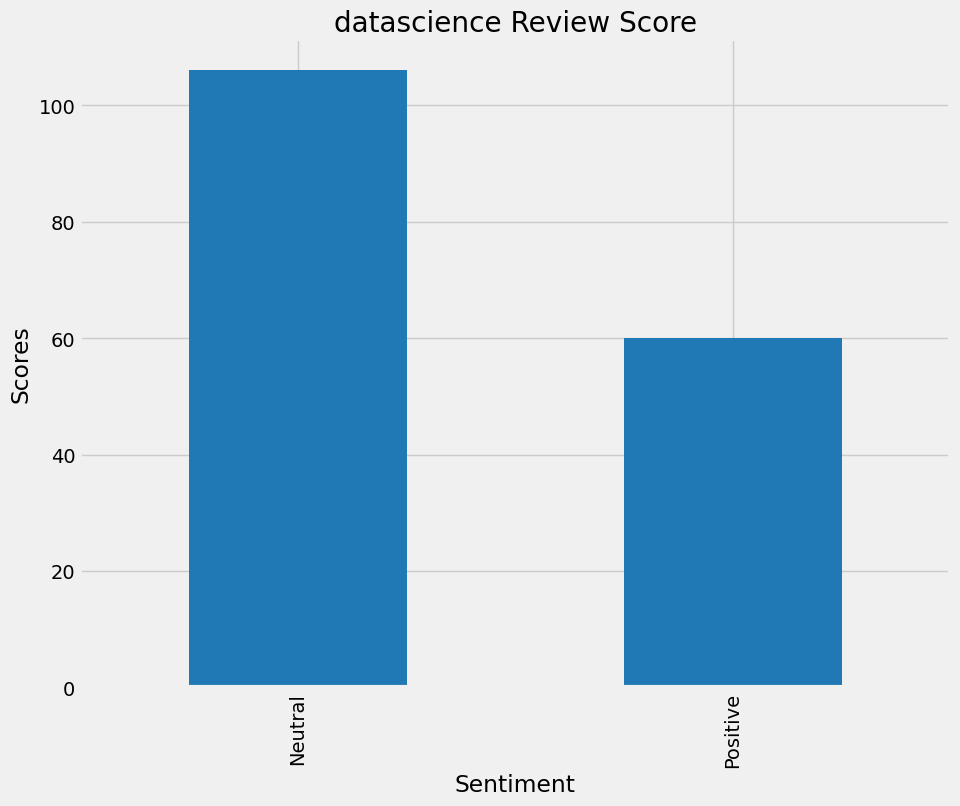

In [38]:
# Plot the values count of sentiment

plt.title("datascience Review Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df2["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

**WORDCLOUD FOR DATASCIENCE**

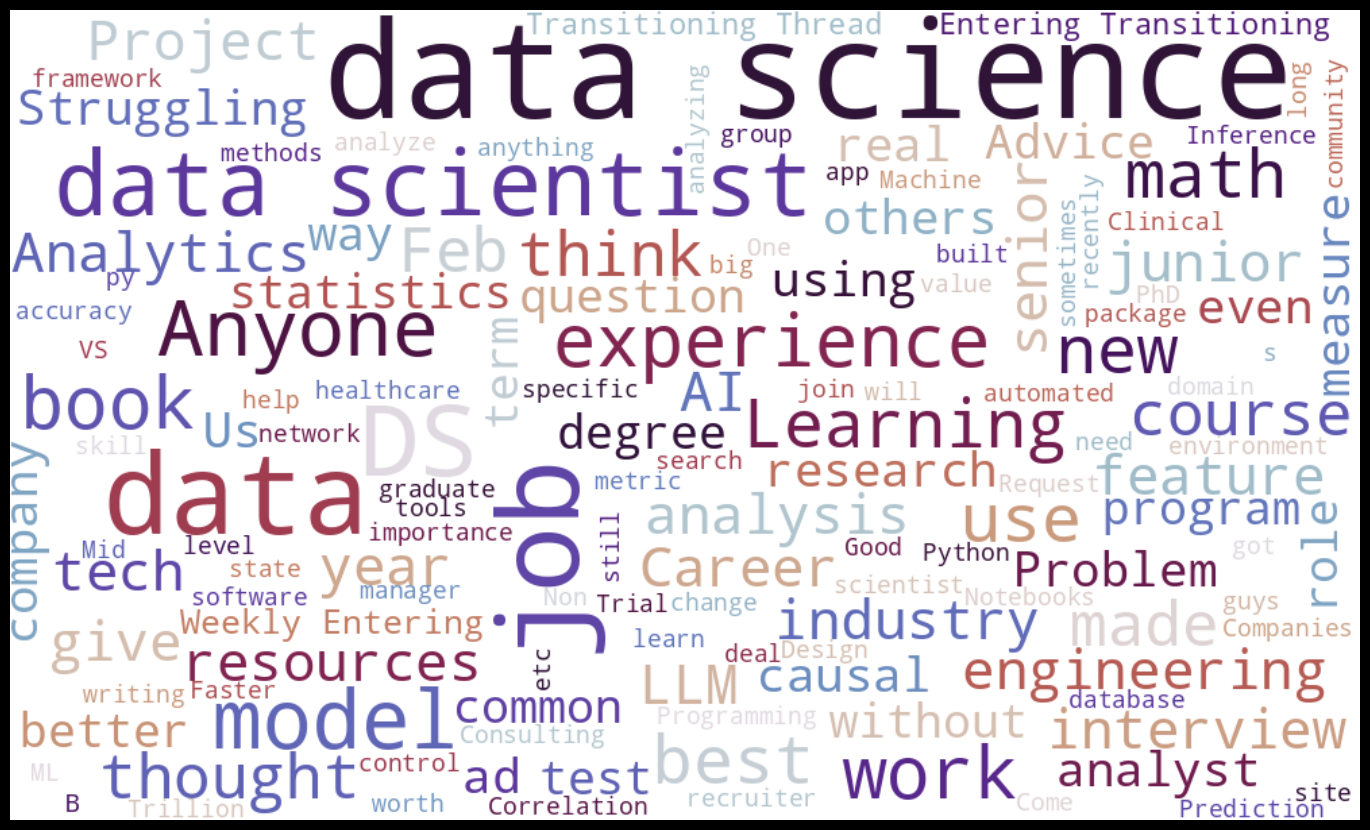

In [52]:
from PIL import Image
import numpy as np

text = ' '.join( [twts for twts in df2['Titles']] )
max_font_size = 100
min_font_size = 15

wordcloud = WordCloud(width=1000,
                      height = 600,
                      max_words = 1000,
                      stopwords = STOPWORDS,
                      contour_width = 0.01,
                      colormap = 'twilight',
                      max_font_size = max_font_size,
                      min_font_size = min_font_size,
                      background_color = "white").generate(text)


plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
plt.show();